# Wine Classification

In [ ]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [4]:
#Load dataset


from sklearn.datasets import load_wine
wine=load_wine()
X=wine.data   #features
y=wine.target
z=wine.feature_names
q=wine.target_names
print("features:\n",X)
print("Labels:\n",y)
print("feature_names:\n",z)
print("target_names:\n",q)

#convert to dataframe
df=pd.DataFrame(X,columns=wine.feature_names)
df['target']=y

#Display first 5 rows
print(df.head())

#Class distribution
print(df['target'].value_counts())

features:
 [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
feature_names:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_win

In [24]:
#Data Cleaning:

#check for missing values

df.isnull().sum() # to check misiising values
df.shape # to check shape

(178, 14)

In [5]:
print(df.info())
print(df.describe())
print(df.dtypes)
print(df.duplicated())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
from sklearn.preprocessing import StandardScaler

#Train Model: Use Logistic Regression (multi_class='ovr').

#split the dataset into training and testing sets:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("Training Data(10):",X_train[:10],"\n")
print("Testing Data(5):",X_test[:5],"\n")
print("Training Target:",y_train)
print("Testing Target:",y_test)

#Standardizing the features:
scaler=StandardScaler()
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)


print("S_training data(10):",X_train_s[10],"\n")
print("S_testing_Data(5):",X_test_s[:5],"\n")


Training Data(10): [[1.434e+01 1.680e+00 2.700e+00 2.500e+01 9.800e+01 2.800e+00 1.310e+00
  5.300e-01 2.700e+00 1.300e+01 5.700e-01 1.960e+00 6.600e+02]
 [1.253e+01 5.510e+00 2.640e+00 2.500e+01 9.600e+01 1.790e+00 6.000e-01
  6.300e-01 1.100e+00 5.000e+00 8.200e-01 1.690e+00 5.150e+02]
 [1.237e+01 1.070e+00 2.100e+00 1.850e+01 8.800e+01 3.520e+00 3.750e+00
  2.400e-01 1.950e+00 4.500e+00 1.040e+00 2.770e+00 6.600e+02]
 [1.348e+01 1.670e+00 2.640e+00 2.250e+01 8.900e+01 2.600e+00 1.100e+00
  5.200e-01 2.290e+00 1.175e+01 5.700e-01 1.780e+00 6.200e+02]
 [1.307e+01 1.500e+00 2.100e+00 1.550e+01 9.800e+01 2.400e+00 2.640e+00
  2.800e-01 1.370e+00 3.700e+00 1.180e+00 2.690e+00 1.020e+03]
 [1.222e+01 1.290e+00 1.940e+00 1.900e+01 9.200e+01 2.360e+00 2.040e+00
  3.900e-01 2.080e+00 2.700e+00 8.600e-01 3.020e+00 3.120e+02]
 [1.267e+01 9.800e-01 2.240e+00 1.800e+01 9.900e+01 2.200e+00 1.940e+00
  3.000e-01 1.460e+00 2.620e+00 1.230e+00 3.160e+00 4.500e+02]
 [1.334e+01 9.400e-01 2.360e+00 1.70

In [11]:
#Training the Logistic Regression Model:


log_reg=LogisticRegression(multi_class='ovr',random_state=42)
log_reg.fit(X_train,y_train)

#Display model parameters:


print("Intercepts:",log_reg.intercept_)
print("Coefficients:\n",log_reg.coef_)

Intercepts: [-0.20573894  0.47509738 -0.11664228]
Coefficients:
 [[-5.21659532e-01  7.70976415e-01  6.76237343e-01 -5.73827827e-01
  -2.71189582e-02  2.75638122e-01  1.18384057e+00  2.00756856e-02
   1.00695200e-02 -1.78158425e-03 -1.01132709e-01  7.07304124e-01
   1.46158705e-02]
 [ 8.66171864e-01 -1.15484665e+00 -8.83978639e-01  2.62973756e-01
  -1.20268337e-03  2.04771739e-02  4.44392288e-01  2.41786290e-01
   7.69021365e-01 -1.74283273e+00  6.38821978e-01  2.93649898e-01
  -1.19905011e-02]
 [-2.78384735e-01  6.62010719e-01  1.06838593e-01  7.45710620e-02
   2.34694633e-02 -5.64407371e-01 -1.70181052e+00 -8.87543265e-02
  -7.18418252e-01  1.05566776e+00 -4.36646383e-01 -1.24073862e+00
  -6.51102737e-04]]


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
#Number of classes and features:

# Number of classes and features
num_classes = log_reg.coef_.shape[0]
num_features = log_reg.coef_.shape[1]
feature_names = wine.feature_names

print("\n Number of classes:",num_classes)
print("\n Number of features:",num_features)
print("\n Number of feature_names:",feature_names)


 Number of classes: 3

 Number of features: 13

 Number of feature_names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


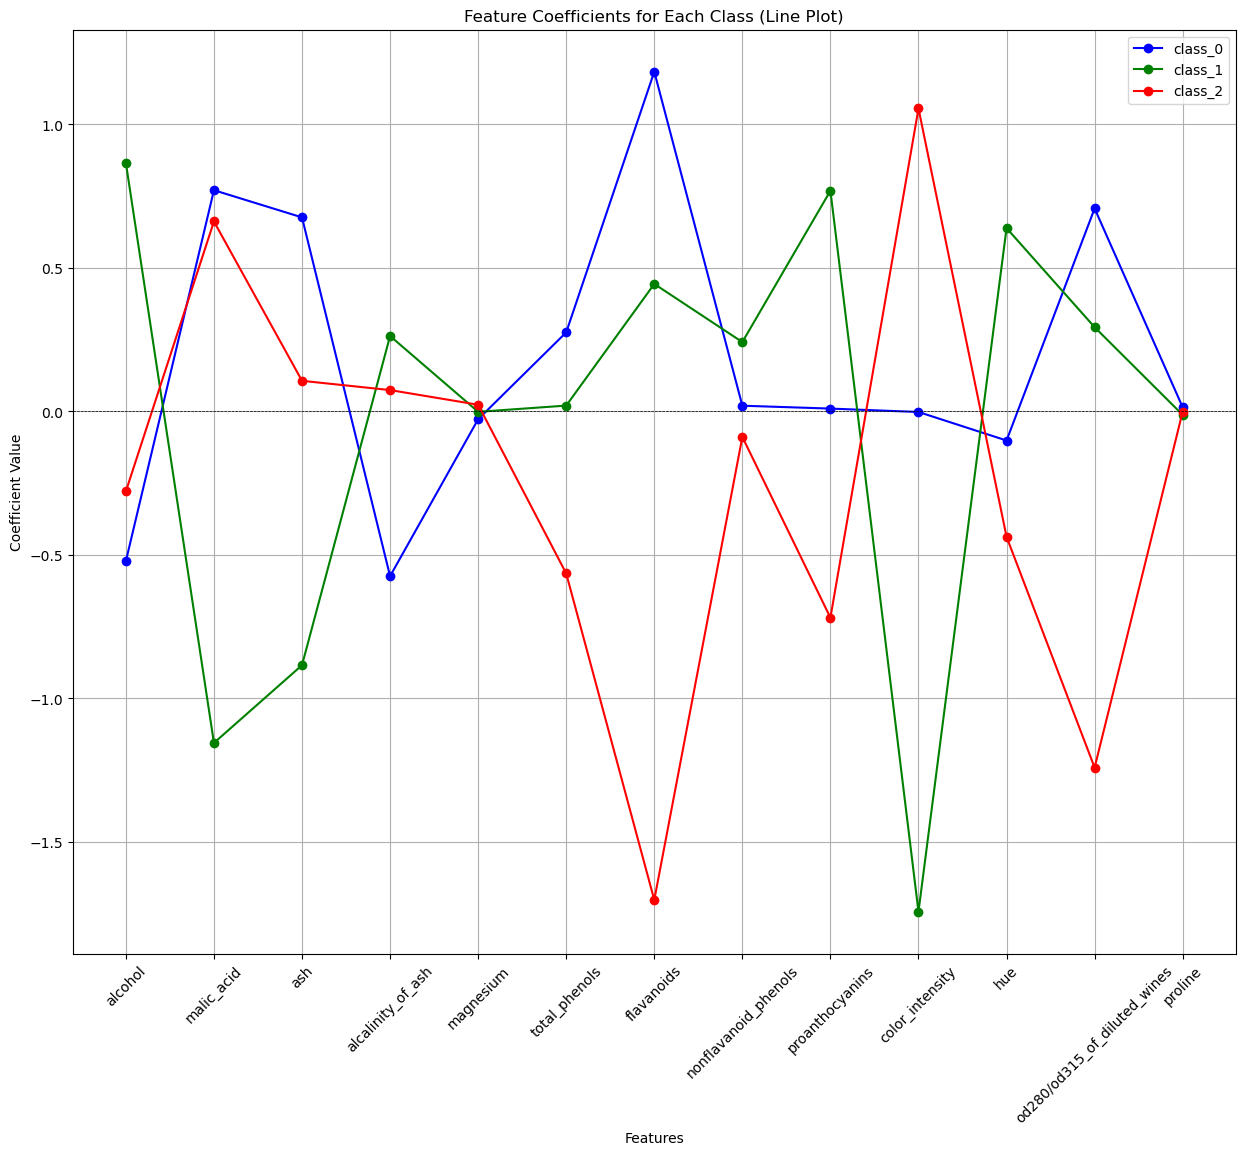

In [18]:
#plotting feature coefficients for each class:

plt.figure(figsize=(15, 12))

# Plot each class separately
colors = ['blue', 'green', 'red']
for i in range(num_classes):
    plt.plot(feature_names, log_reg.coef_[i], marker='o', linestyle='-', color=colors[i], label=wine.target_names[i])

plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Coefficients for Each Class (Line Plot)")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Reference line at y=0
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [19]:
#making predictions
y_pred=log_reg.predict(X_test)
print(y_pred)


#feature_importance

feature_importance=log_reg.coef_
print("Feature importance :\n",feature_importance)


[0 0 2 0 1 0 1 2 1 2 1 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
Feature importance :
 [[-5.21659532e-01  7.70976415e-01  6.76237343e-01 -5.73827827e-01
  -2.71189582e-02  2.75638122e-01  1.18384057e+00  2.00756856e-02
   1.00695200e-02 -1.78158425e-03 -1.01132709e-01  7.07304124e-01
   1.46158705e-02]
 [ 8.66171864e-01 -1.15484665e+00 -8.83978639e-01  2.62973756e-01
  -1.20268337e-03  2.04771739e-02  4.44392288e-01  2.41786290e-01
   7.69021365e-01 -1.74283273e+00  6.38821978e-01  2.93649898e-01
  -1.19905011e-02]
 [-2.78384735e-01  6.62010719e-01  1.06838593e-01  7.45710620e-02
   2.34694633e-02 -5.64407371e-01 -1.70181052e+00 -8.87543265e-02
  -7.18418252e-01  1.05566776e+00 -4.36646383e-01 -1.24073862e+00
  -6.51102737e-04]]


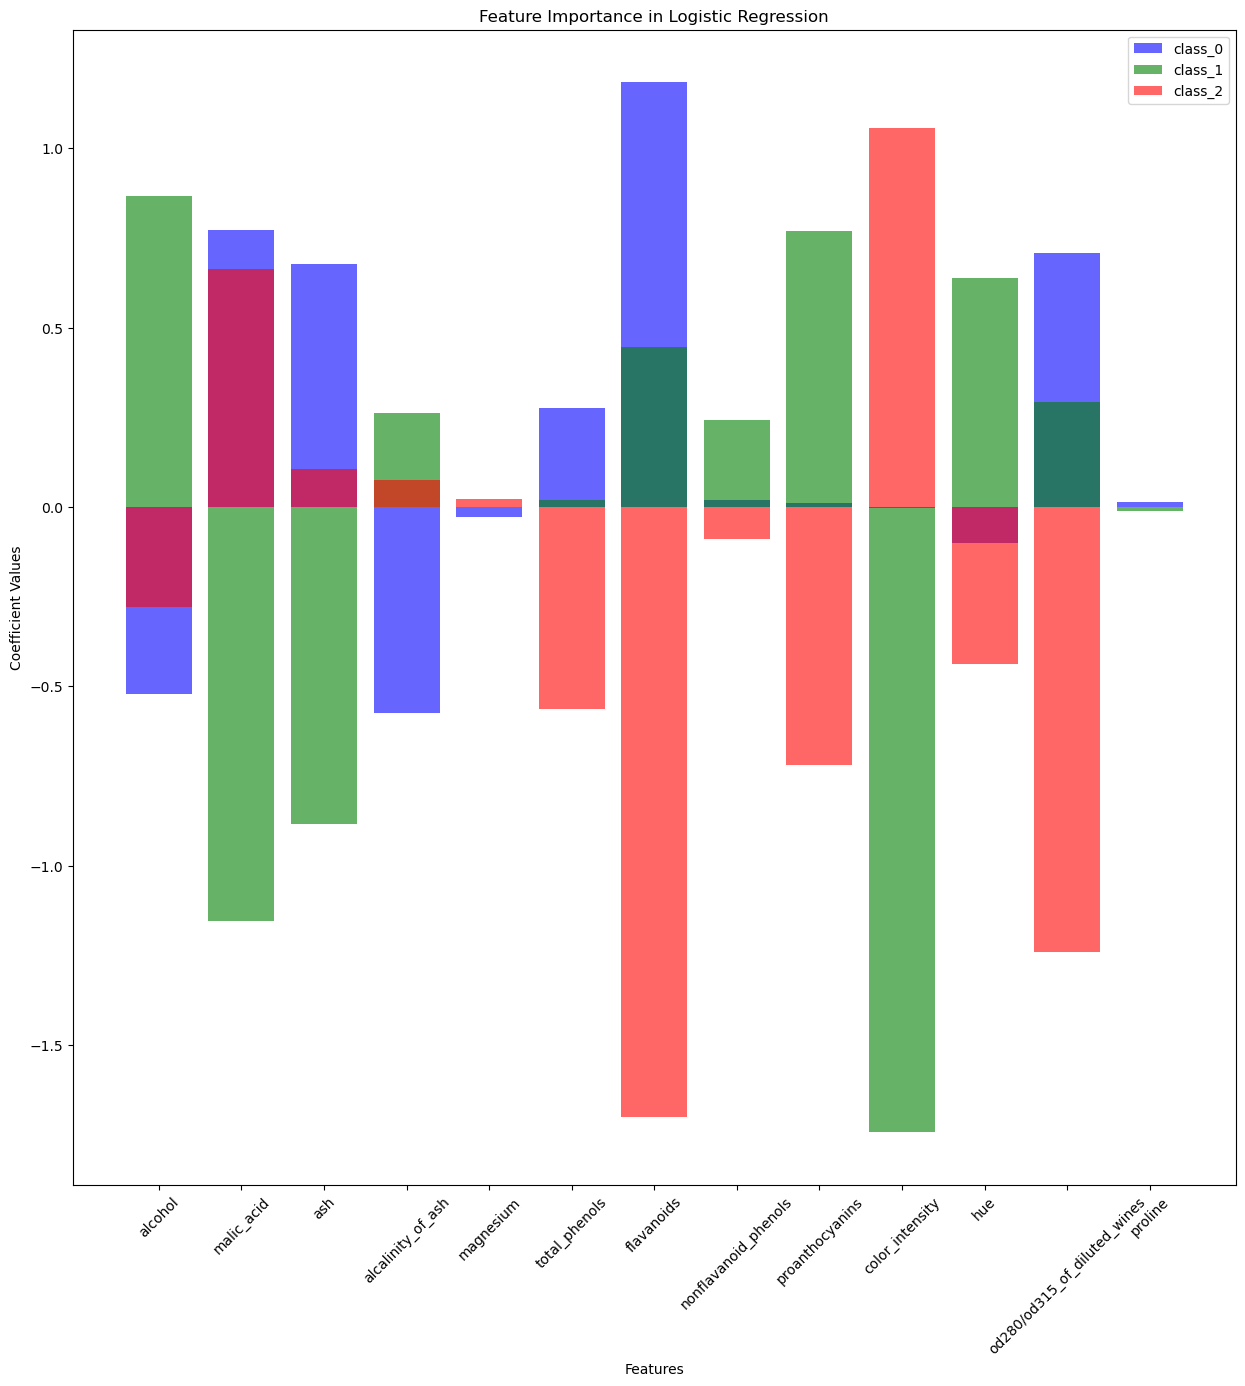

In [22]:
#Feature importance in logistic regression:
plt.figure(figsize=(15, 15))
plt.bar(wine.feature_names, log_reg.coef_[0], color='blue', alpha=0.6, label='class_0')
plt.bar(wine.feature_names, log_reg.coef_[1], color='green', alpha=0.6, label='class_1')
plt.bar(wine.feature_names, log_reg.coef_[2], color='red', alpha=0.6, label='class_2')
plt.xlabel("Features")
plt.ylabel("Coefficient Values")
plt.legend()
plt.xticks(rotation=45)
plt.title("Feature Importance in Logistic Regression")
plt.show()

In [21]:
#Evaluate  the model:

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:\n",accuracy)

conf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)

class_report=classification_report(y_test,y_pred)
print("Classification Report:\n",class_report)

Accuracy:
 0.9722222222222222
Confusion Matrix:
 [[13  1  0]
 [ 0 14  0]
 [ 0  0  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [ ]:
# Key Observations from the Report

# Class 0:

# Precision = 1.00 → All predicted "0" labels were correct.
# Recall = 0.93 → Some actual "0" labels were misclassified.
# F1-score = 0.96 → Good balance between precision & recall.

# Class 1:

# Precision = 0.93 → A few predicted "1" labels were incorrect.
# Recall = 1.00 → All actual "1" labels were correctly predicted.
# F1-score = 0.97 → High accuracy.

# Class 2:

# Precision = 1.00, Recall = 1.00 → Perfect classification for this class! 
# Macro avg vs. Weighted avg:

# Macro avg treats all classes equally.
# Weighted avg considers the number of samples in each class.
# Since both are ~0.97-0.98, performance is consistent across classes.